(8399, 3072) (8399,)
Training on Fold:  1
Epoch 1/30
107/107 [==============================] - ETA: 0s - loss: 1.3752 - accuracy: 0.6775
Epoch 1: val_loss improved from inf to 7.32276, saving model to fas_mnist_1.h5
107/107 [==============================] - 24s 220ms/step - loss: 1.3752 - accuracy: 0.6775 - val_loss: 7.3228 - val_accuracy: 0.4881
Epoch 2/30
107/107 [==============================] - ETA: 0s - loss: 0.7919 - accuracy: 0.7932
Epoch 2: val_loss did not improve from 7.32276
107/107 [==============================] - 24s 220ms/step - loss: 0.7919 - accuracy: 0.7932 - val_loss: 9.3818 - val_accuracy: 0.4881
Epoch 3/30
107/107 [==============================] - ETA: 0s - loss: 0.5707 - accuracy: 0.8252
Epoch 3: val_loss did not improve from 7.32276
107/107 [==============================] - 24s 220ms/step - loss: 0.5707 - accuracy: 0.8252 - val_loss: 14.1687 - val_accuracy: 0.4881
Epoch 4/30
107/107 [==============================] - ETA: 0s - loss: 0.4324 - accuracy: 0.849

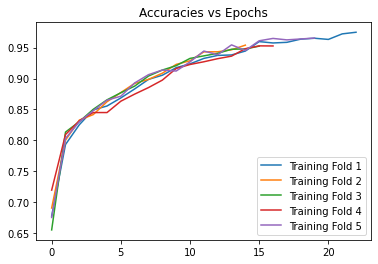

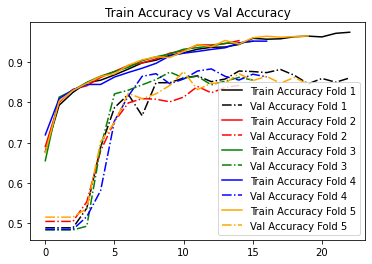

In [1]:
import numpy
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
import pickle
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ModelCheckpoint, EarlyStopping


def read_data(label_ids: list):
    all_desired_data = []
    all_desired_label = []

    for file in os.listdir('C:/Users/hp/Desktop/ml_project/data'):
        file_name = "C:/Users/hp/Desktop/ml_project/data/" + file
        if file == "batches.meta":
            continue
        with open(file_name, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')

        desired_data_ids = [i for i, v in enumerate(dict[b'labels']) if v in label_ids]
        desired_data = [dict[b'data'][x] for x in desired_data_ids]
        desired_label = [dict[b'labels'][x] for x in desired_data_ids]
        all_desired_data += desired_data
        all_desired_label += desired_label

    return all_desired_data, all_desired_label


def split_data(x, y):
    x_train_validate, x_test, y_train_validate, y_test = train_test_split(x, y, test_size=0.15, random_state=0, stratify=y)
    x_train, x_validate, y_train, y_validate = train_test_split(x_train_validate, y_train_validate, test_size=(15*len(x))/(100*len(x_train_validate)), random_state=0, stratify=y_train_validate)
    return [x_train, y_train], [x_test, y_test], [x_validate, y_validate]

def fit_and_evaluate(t_x, val_x, t_y, val_y, EPOCHS=20, BATCH_SIZE=128,learning_rate=0.01):
    model = None
#Creating the model
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', use_bias=True))
    model.add(keras.layers.Activation('relu'))

    model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same', use_bias=True))
    model.add(keras.layers.MaxPooling2D(2))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same', use_bias=True))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.Dense(32, activation='relu', use_bias=True))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Dense(class_num, activation='softmax', use_bias=True))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) 
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE ,callbacks=[early_stopping, model_checkpoint], 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results
#function to draw confusion matrix
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds,labels=[4, 7])
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    plt.show()
#function for converting predictions to labels
def prep_submissions(preds_array):
    preds_df = pd.DataFrame(preds_array)
    predicted_labels = preds_df.idxmax(axis=1) #convert back one hot encoding to categorical variabless
    return predicted_labels
 
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()
    
if __name__ == '__main__':
    label_ids = [4, 7]
    data, label = read_data(label_ids=label_ids)
    train, test, validate = split_data(data, label)
    X_train=train[0]
    X_test=test[0]
    y_test=test[1]
    y_train=train[1]


# Set random seed for purposes of reproducibility
# seed = 21

# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
    #print (y_train)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    print(X_train.shape, y_train.shape)    
    X_test =X_test.reshape(len(X_test),32,32,3)
    #X_test = X_test.transpose(0,2,3,1)
    X_train =X_train.reshape(len(X_train),32,32,3)
    #X_train = X_train.transpose(0,2,3,1)
    X_train = np.array(X_train, dtype=np.float32)
    X_test = np.array(X_test, dtype=np.float32)
    X_train = X_train / 255.0
    X_test = X_test / 255.0

# One-hot encode outputs
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    class_num = y_test.shape[1]

    
    




 

    #numpy.random.seed(seed)
    pat = 5 #this is the number of epochs with no improvment after which the training will stop
    early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)
    #define the model checkpoint callback -> this will keep on saving the model as a physical file
    model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)

    #define a function to fit the model
    
    n_folds=5
    epochs=30
    batch_size=64
    model_history = []
    for i in range(n_folds):
        print("Training on Fold: ",i+1)
        t_x, val_x, t_y, val_y = train_test_split(X_train, y_train, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
        model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, epochs, batch_size))
        print("======="*12, end="\n\n\n")

    plt.title('Accuracies vs Epochs')
    plt.plot(model_history[0].history['accuracy'], label='Training Fold 1')
    plt.plot(model_history[1].history['accuracy'], label='Training Fold 2')
    plt.plot(model_history[2].history['accuracy'], label='Training Fold 3')
    plt.plot(model_history[3].history['accuracy'], label='Training Fold 4')
    plt.plot(model_history[4].history['accuracy'], label='Training Fold 5')
    plt.legend()
    plt.show()
    plt.title('Train Accuracy vs Val Accuracy')
    plt.plot(model_history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
    plt.plot(model_history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
    plt.plot(model_history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
    plt.plot(model_history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
    plt.plot(model_history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
    plt.plot(model_history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = 
             
             
             "dashdot")
    plt.plot(model_history[3].history['accuracy'], label='Train Accuracy Fold 4', color='blue')
    plt.plot(model_history[3].history['val_accuracy'], label='Val Accuracy Fold 4', color='blue', linestyle = "dashdot")
    plt.plot(model_history[4].history['accuracy'], label='Train Accuracy Fold 5', color='orange')
    plt.plot(model_history[4].history['val_accuracy'], label='Val Accuracy Fold 5', color='orange', linestyle = "dashdot")
    plt.legend()
    plt.show()
   
   
    

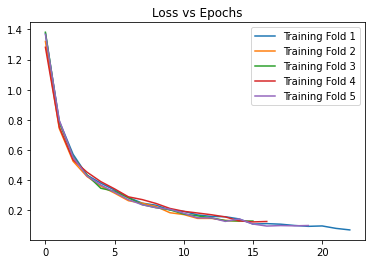

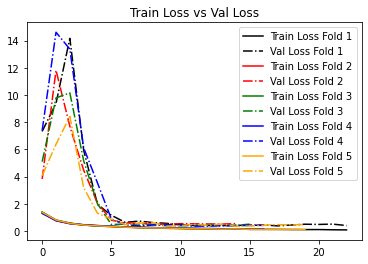

57/57 [==============================] - 1s 19ms/step - loss: 0.3834 - accuracy: 0.8556
Accuracy: 85.56%
Loss: 0.38%
              precision    recall  f1-score   support

           4       0.87      0.84      0.85       900
           7       0.84      0.87      0.86       900

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



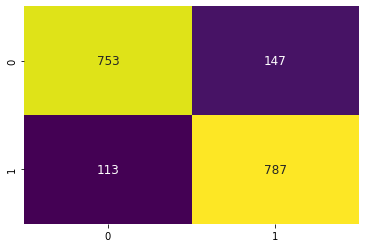

In [2]:
    plt.title('Loss vs Epochs')
    plt.plot(model_history[0].history['loss'], label='Training Fold 1')
    plt.plot(model_history[1].history['loss'], label='Training Fold 2')
    plt.plot(model_history[2].history['loss'], label='Training Fold 3')
    plt.plot(model_history[3].history['loss'], label='Training Fold 4')
    plt.plot(model_history[4].history['loss'], label='Training Fold 5')
    plt.legend()
    plt.show()
    plt.title('Train Loss vs Val Loss')
    plt.plot(model_history[0].history['loss'], label='Train Loss Fold 1', color='black')
    plt.plot(model_history[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")
    plt.plot(model_history[1].history['loss'], label='Train Loss Fold 2', color='red', )
    plt.plot(model_history[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")
    plt.plot(model_history[2].history['loss'], label='Train Loss Fold 3', color='green', )
    plt.plot(model_history[2].history['val_loss'], label='Val Loss Fold 3', color='green', linestyle = "dashdot")
    plt.plot(model_history[3].history['loss'], label='Train Loss Fold 4', color='blue')
    plt.plot(model_history[3].history['val_loss'], label='Val Loss Fold 4', color='blue', linestyle = "dashdot")
    plt.plot(model_history[4].history['loss'], label='Train Loss Fold 5', color='orange')
    plt.plot(model_history[4].history['val_loss'], label='Val Loss Fold 5', color='orange', linestyle = "dashdot")
    plt.legend()
    plt.show()
    #Load the model that was saved by ModelCheckpoint
    model = load_model('fas_mnist_1.h5')
    model.evaluate(X_test, y_test)
    scores = model.evaluate(X_test, y_test, verbose=0)
   
    

Résultats de test sur les données de test:
Accuracy: 85.56%
Loss:  0.38340693712234497
              precision    recall  f1-score   support

           4       0.87      0.84      0.85       900
           7       0.84      0.87      0.86       900

    accuracy                           0.86      1800
   macro avg       0.86      0.86      0.86      1800
weighted avg       0.86      0.86      0.86      1800



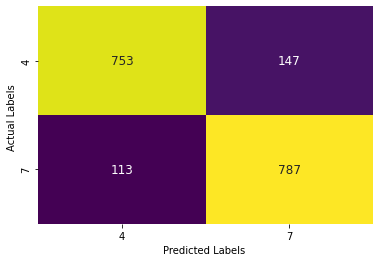

In [13]:
    def draw_confusion_matrix(true,preds):
        conf_matx = confusion_matrix(true, preds)
        S=sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis",xticklabels=[4,7], yticklabels=[4,7])
        S.set(xlabel='Predicted Labels ', ylabel='Actual Labels ')
        plt.show()
    print("Résultats de test sur les données de test:")
    print("Accuracy: %.2f%%" % (scores[1]*100))  
    print("Loss: ", (scores[0])) 
    test_preds = model.predict(X_test)
    test_preds_labels = prep_submissions(test_preds)
    print(classification_report(test[1], test_preds_labels))
    draw_confusion_matrix(test[1], test_preds_labels)